In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# An Agent-based Model of a Neuronal Network

##### Sahand Hariri
Spring 2017

# Design of the simulation

+ Each Neuron is modeled as an agent. 
+ The governing model for each neuron is the Fittzhugh-Nagumo model (shown later). 
+ Each neuron contains a list of neurons to which it has formed a synapse.
+ There is an object called "Brain" that controls the simulation.


# Fittshugh-Nagumo Model

There are two variables $V$ and $w$ in the model which represent memberane potential (fast variable), and the current flow (slow variable) respectively. 
The equations are as follow:

\begin{align*}
\frac{dV_i}{dt} =& V_i - \frac{V_i^3}{3} - w_i + I + s_iV_j\\
\frac{dw_i}{dt} =& \frac{1}{\tau}(V_i + a - b w_i)
\end{align*}

As can be seen, there are four parameters in the system: 

- $a = unif(0.6,0.9)$ 
- $b = unif(0.5,0.9)$
- $\tau = unif(10,14)$
- $I = \begin{cases}1, i=1\\ 0, i\neq1 \end{cases}$, for neuron number $i$. 
- $s_i = unif(0.09,0.11)$

# Underdeveloped Network

In [2]:
from NeuroNet import *
%config InlineBackend.figure_formats=['svg']
plt.rcParams["figure.figsize"] = (13, 2)
import time

In [15]:
eps  = 1e-4 # This is the time scale.
tend = 400*eps
dt   = 0.1*eps

numNeurons = 20
displaynum = min(10,numNeurons)
neurons = []


for i in range(numNeurons):
    if i==0:
        I=1
    else:
        I=0
    n = Neuron(i,dt=dt,tend=tend, eps=eps, a=np.random.uniform(0.6,0.9),b=np.random.uniform(0.5,0.9),tau=np.random.uniform(10,14),I=I)
    n.Initialize([0,0])
    n.SetNoise(0,0.0)
    n.SetFlow(n.FHNFlow)
    n.SetSynapseLimit(np.random.uniform(980,1020))
    neurons.append(n)
    
b = Brain(neurons=neurons,dt=dt,tend=tend,connectionscale=200)
for i in tnrange(200,desc='Syn Dev'):
    b.DevelopSynapseNetwork()
#%prun b.Simulate()
b.Simulate()

# Underdeveloped Network (100 Neurons)

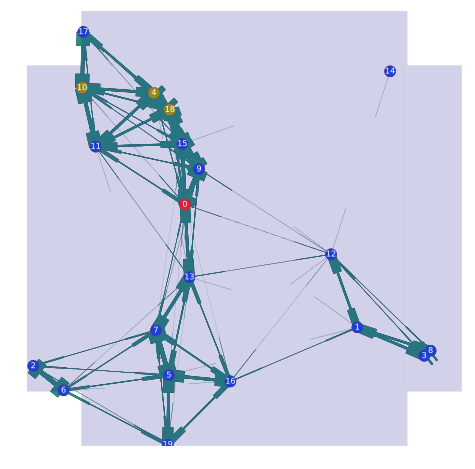

In [16]:
plt.rcParams["figure.figsize"] = (8,8)
vis = Visualization(network=b._Network,neurons=b._Neurons, synapsecount=b._SynapseCountHistory)
vis._EdgeLabels = b._EdgeLabels
vis._NetworkEdgeWeightFactor = 30
vis.DrawNetwork(edgelabels=False)

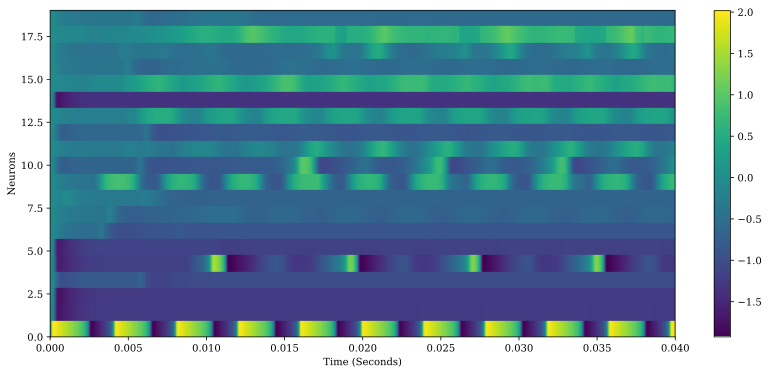

In [17]:
plt.rcParams["figure.figsize"] = (14, 6)
vis.PlotTimeFrequency()

# Action potential observed in active neurons:

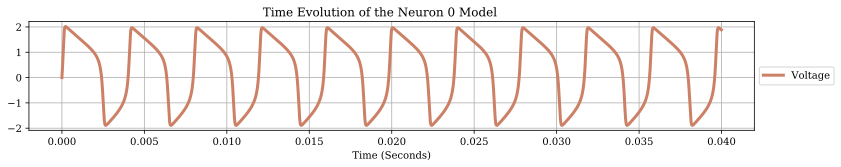

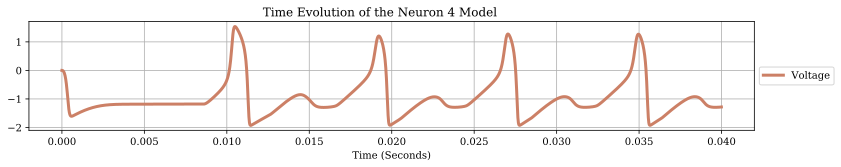

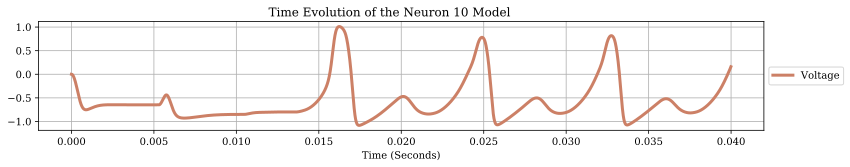

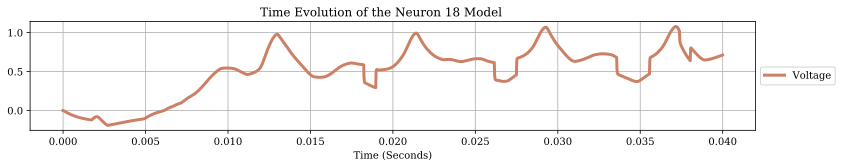

Displaying 4 active neurons. 0 more active neurons are present.


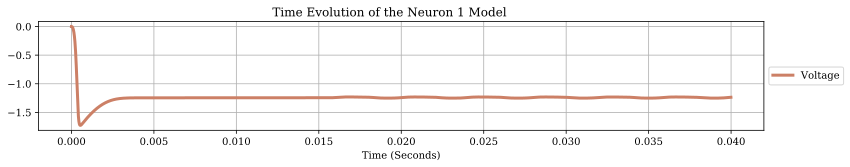

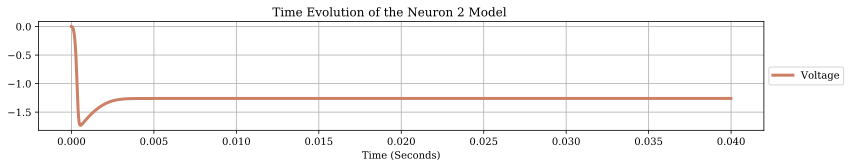

Displaying 2 inactive neurons. 14 more inactive neurons are present.


In [18]:
plt.rcParams["figure.figsize"] = (13, 2)
b.CollectActiveNeurons()
ActiveNeurons = b._ActiveNeurons;
numberToShow = min(5,len(ActiveNeurons))
for n in range(numberToShow):
    ActiveNeurons[n].PlotState(states={0:"V"},legend=["Voltage"],colors=[[0.8,0.5,0.4]])
print("Displaying {} active neurons. {} more active neurons are present.".format(numberToShow,len(ActiveNeurons)-numberToShow))

InactiveNeurons = b._InactiveNeurons;
numberToShow = min(2,len(InactiveNeurons))
for n in range(numberToShow):
    InactiveNeurons[n].PlotState(states={0:"V"},legend=["Voltage"],colors=[[0.8,0.5,0.4]])
print("Displaying {} inactive neurons. {} more inactive neurons are present.".format(numberToShow,len(InactiveNeurons)-numberToShow))

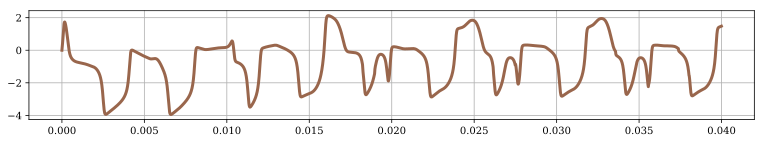

In [19]:
vis.PlotOutputSignal()

# Some Network properties

### Connectivity Properties and Degree Distributions:

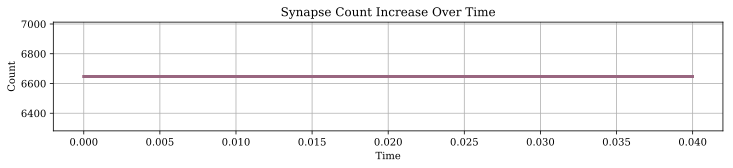

6647


In [20]:
plt.rcParams["figure.figsize"] = (12, 2)
vis.PlotSynapseRank()
print(b._SynapseCount)

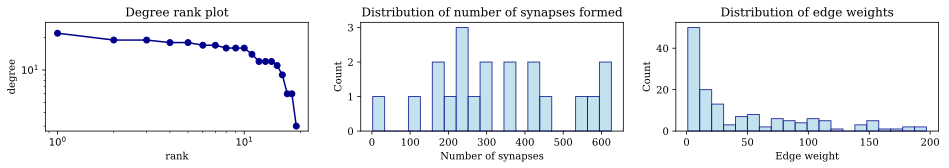

In [21]:
plt.rcParams["figure.figsize"] = (16,2)
vis.PlotConnectivityProperties()

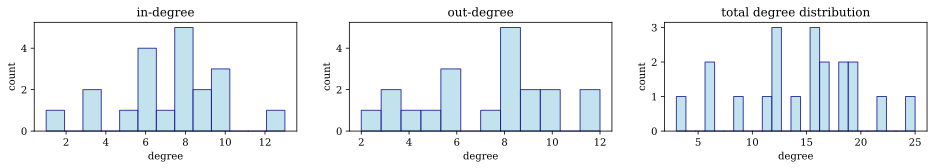

In [22]:
plt.rcParams["figure.figsize"] = (16,2)
vis.PlotDegreeDistribution()

# Eigenvalues:

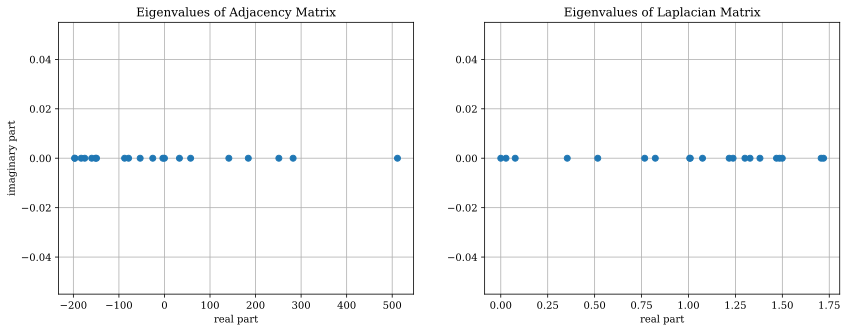

In [23]:
plt.rcParams["figure.figsize"] = (14,5)
vis.PlotEigenValues()

# Data Handling

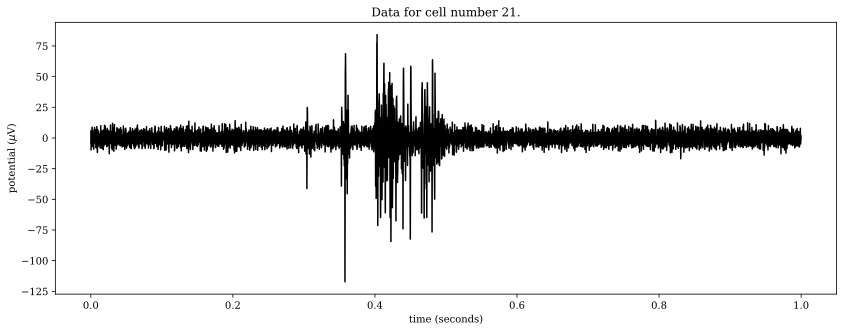

In [12]:
d21 = DataImport(datafolder='/Users/sahand/Research/NeuroNet/Data/2017.02.21/',filename='0004mDiv13_filt0001_21.dat')
d21.Read()
d21.QuickView()

#d21.ButterWorthFilter(order=3, cutoff=.3)
#d21.QuickView()

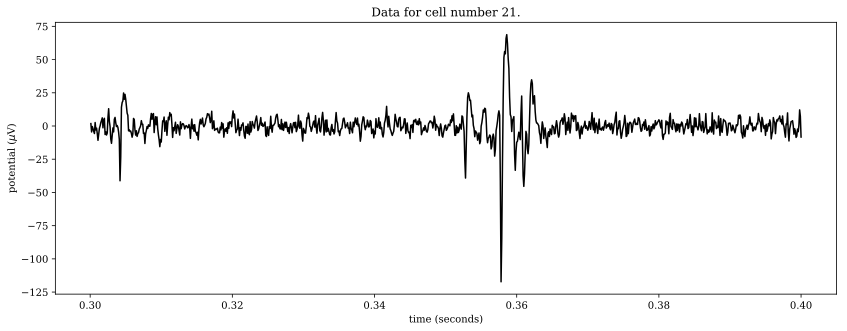

In [13]:
d21.ZoomPlot(t1=300,t2=400)

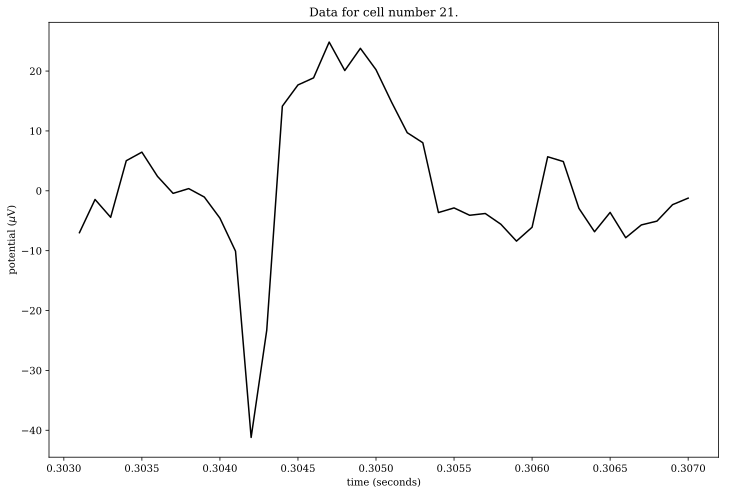

In [14]:
plt.rcParams["figure.figsize"] = (12, 8)
d21.ZoomPlot(t1=303,t2=307)